### **1. Import Libraries**

Import the required libraries for data manipulation, visualization, preprocessing, and model building.


In [1]:

# write your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

### **2. Download and Load the Data**

Download the [Airlines Customer satisfaction dataset](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction) from Kaggle and load it into a pandas DataFrame. Also, display the first few rows of the dataset.


In [4]:
# write your code
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Invistico_Airline.csv')
print(data.head())



Saving Invistico_Airline.csv to Invistico_Airline.csv
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0       

### **3. Explore the Data**

- Check the dataset information using the `info()` method.
- Check for missing values in the dataset. You can use the `isnull()` method along with the `sum()` method to check the total number of missing values in each column.


In [5]:
# write your code

print("Dataset Information:")
print(data.info())
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi serv

### **4. Data Preprocessing**

#### **4.1 Handle Missing Values**

- The `Arrival Delay in Minutes` column contains missing values. You can fill these missing values using any of the following methods:
  - Fill with the mean, median, or mode of the column using the `SimpleImputer` class from scikit-learn.
  - Impute the missing values using other methods like K-Nearest Neighbors (KNN). Available in the `sklearn.impute` module.


In [7]:
# write your code
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Change to 'median' or 'most_frequent' for median or mode
data['Arrival Delay in Minutes'] = imputer.fit_transform(data[['Arrival Delay in Minutes']])
print("Missing values after imputation (SimpleImputer):")
print(data['Arrival Delay in Minutes'].isnull().sum())



Missing values after imputation (SimpleImputer):
0


#### **4.2 Encode Categorical Variables**

We have five categorical columns in the dataset,`satisfaction`, `Gender`, `Customer Type`, `Type of Travel`, and `Class`.

- Use the `LabelEncoder` class from scikit to encode the `satisfaction` column as it is the target column.
- Use the `OneHotEncoder` class from scikit-learn or the `get_dummies()` method from pandas to encode the other categorical columns into one-hot vectors.


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])
print("Encoded 'satisfaction' column:")
print(data['satisfaction'].head())



Encoded 'satisfaction' column:
0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64


#### **4.3 Visualize Features Correlation**

- Create a heatmap to visualize the correlation between the features using the `seaborn` library. For correlation, you can use the `corr()` method from pandas.
- Observe the correlation between the features and the target column. You can keep the features that have a higher correlation with the target column and drop the rest.

**Note:** The decision to drop or keep features is on you. Bonus points will be awarded if you select the features that gave the best results.


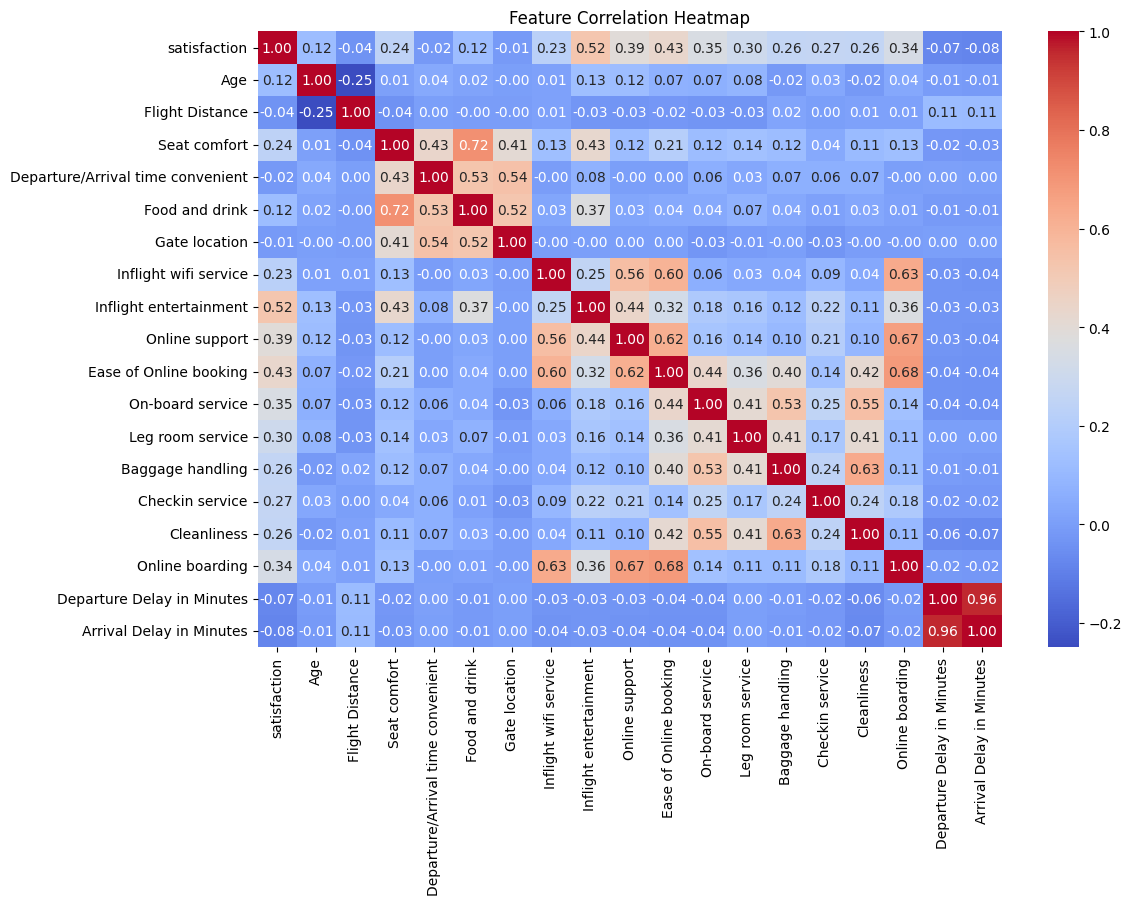

Correlation of features with 'satisfaction':
satisfaction                         1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Flight Distance                     -0.039224
Departure Delay in Minutes          -0.073909
Arrival Delay in Minutes            -0.080567
Name: satisfaction, dtype: float64


In [17]:

numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
correlation_with_target = correlation_matrix['satisfaction'].sort_values(ascending=False)
print("Correlation of features with 'satisfaction':")
print(correlation_with_target)


In [12]:

print(data.dtypes)

non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numerical columns:", non_numeric_columns)


satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [19]:

data_encoded = pd.get_dummies(data, drop_first=True)

print(data_encoded.head())





   satisfaction  Age  Flight Distance  Seat comfort  \
0             1   65              265             0   
1             1   47             2464             0   
2             1   15             2138             0   
3             1   60              623             0   
4             1   70              354             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   

   Inflight wifi service  Inflight entertainment  Online support  ...  \
0                      2                       4               2  ...   
1                      0                       2               2  ...   
2                      

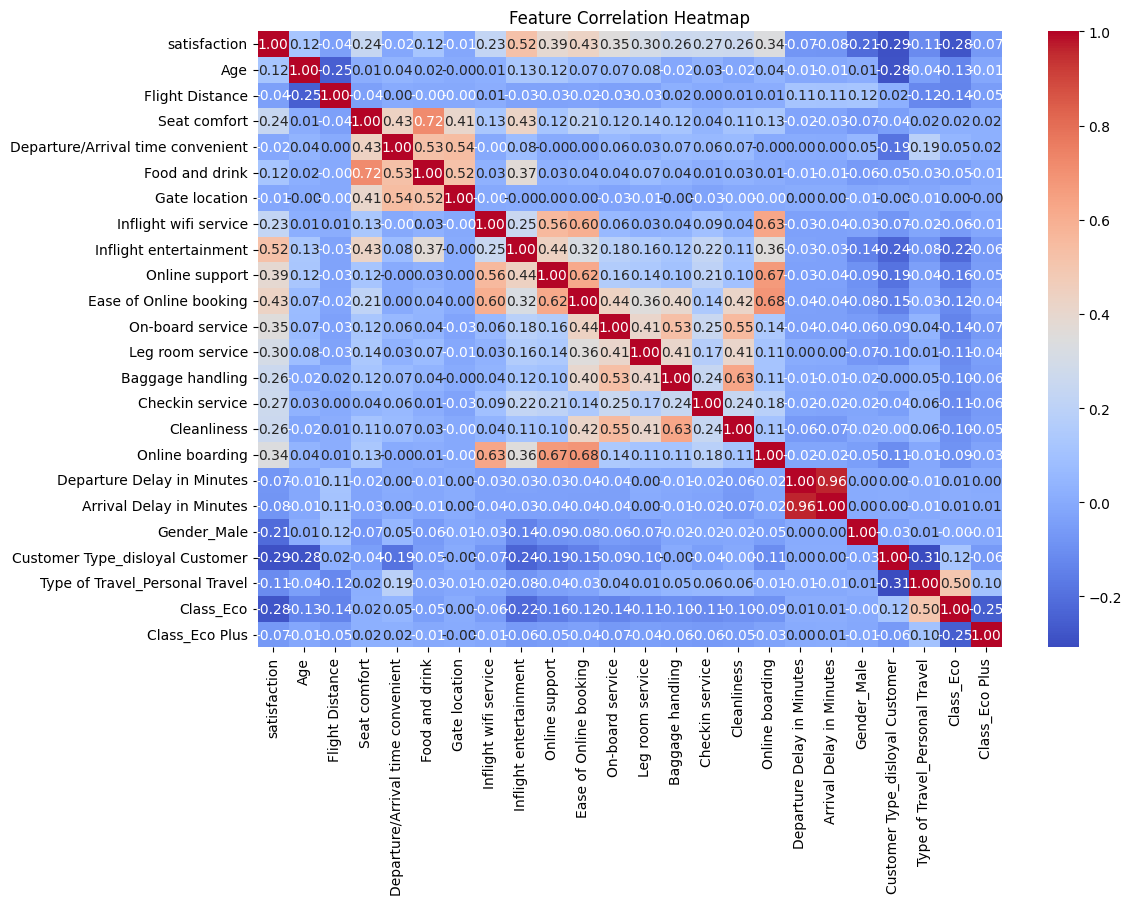

Correlation of features with 'satisfaction':
satisfaction                         1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Flight Distance                     -0.039224
Class_Eco Plus                      -0.067537
Departure Delay in Minutes          -0.073909
Arrival Delay in Minutes            -0.080567
Type of Travel_Personal Travel     

In [20]:

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
correlation_with_target = correlation_matrix['satisfaction'].sort_values(ascending=False)
print("Correlation of features with 'satisfaction':")
print(correlation_with_target)


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
correlation_with_target = correlation_matrix['satisfaction'].sort_values(ascending=False)
print("Correlation of features with 'satisfaction':")
print(correlation_with_target)


ValueError: could not convert string to float: 'Female'

#### **4.4 Scale Numerical Features**

Scale the numerical features using the `StandardScaler` class from scikit-learn.
**Note:** Keep the target column as it is.


In [22]:
# write your code
from sklearn.preprocessing import StandardScaler
target_column = 'satisfaction'
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
print("Scaled dataset:")
print(data_scaled.head())



Scaled dataset:
        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0  1.691351        -1.671103     -2.037791                           -1.95823   
1  0.500820         0.469852     -2.037791                           -1.95823   
2 -1.615680         0.152458     -2.037791                           -1.95823   
3  1.360648        -1.322552     -2.037791                           -1.95823   
4  2.022054        -1.584452     -2.037791                           -1.95823   

   Food and drink  Gate location  Inflight wifi service  \
0       -1.975443      -0.758383              -0.947163   
1       -1.975443       0.007334              -2.463679   
2       -1.975443       0.007334              -0.947163   
3       -1.975443       0.007334              -0.188905   
4       -1.975443       0.007334               0.569353   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                0.458022       -1.163181               -0.361613  .

#### **4.5 Separate Features and Target**

- `X` will contain all the features, and `y` will contain the target column, i.e., `satisfaction`.


In [23]:
# write your code

target_column = 'satisfaction'
X = data_scaled.drop(columns=[target_column])
y = data_scaled[target_column]
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())



Features (X):
        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0  1.691351        -1.671103     -2.037791                           -1.95823   
1  0.500820         0.469852     -2.037791                           -1.95823   
2 -1.615680         0.152458     -2.037791                           -1.95823   
3  1.360648        -1.322552     -2.037791                           -1.95823   
4  2.022054        -1.584452     -2.037791                           -1.95823   

   Food and drink  Gate location  Inflight wifi service  \
0       -1.975443      -0.758383              -0.947163   
1       -1.975443       0.007334              -2.463679   
2       -1.975443       0.007334              -0.947163   
3       -1.975443       0.007334              -0.188905   
4       -1.975443       0.007334               0.569353   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                0.458022       -1.163181               -0.361613  ...

#### **4.6 Feature Engineering**

- You can create new features by combining the existing features that can help improve the model's performance. For example:
    - Mutiply two features to create a new feature.
    - Take the square, cube, or square root of a feature to create a new feature.
    - You also can consider log transformation of the features.
- Create new features from the existing features that can help improve the model's performance. For example, `sklearn.preprocessing.PolynomialFeatures` can be used to create polynomial features.
- From the `sklearn.feature_selection` module you can use methods like `SelectKBest`, `RFECV`, `RFE`, etc., to select the best features.

**Note:** Feature engineering can help improve the model's performance. Bonus points will be awarded if you perform feature engineering that improves the model's performance.


In [26]:
print("Available columns in the DataFrame:")
print(X.columns)


Available columns in the DataFrame:
Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [27]:
# Replace 'Feature1' and 'Feature2' with the actual column names you're using
print("'Feature1' in DataFrame:", 'Feature1' in X.columns)
print("'Feature2' in DataFrame:", 'Feature2' in X.columns)


'Feature1' in DataFrame: False
'Feature2' in DataFrame: False


In [28]:
X['Gender_Male'] = X['Gender_Male'] * X['Age']


In [29]:
if 'Feature1' in X.columns and 'Feature2' in X.columns:
    X['Feature1*Feature2'] = X['Feature1'] * X['Feature2']
else:
    print("Required columns not found in the DataFrame.")


Required columns not found in the DataFrame.


In [30]:

print("Available columns:", X.columns)
if 'Feature1' in X.columns and 'Feature2' in X.columns:
    X['Feature1*Feature2'] = X['Feature1'] * X['Feature2']
else:
    print("Feature1 or Feature2 not found in the DataFrame.")


Available columns: Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')
Feature1 or Feature2 not found in the DataFrame.


In [31]:

X['Feature1*Feature2'] = X['Feature1'] * X['Feature2']

X['Feature1^2'] = X['Feature1'] ** 2
X['Feature1_sqrt'] = X['Feature1'] ** 0.5

import numpy as np
X['Feature1_log'] = np.log1p(X['Feature1'])  # log1p handles log(0)







KeyError: 'Feature1'

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
print("Polynomial features created:")
print(X_poly.head())


Polynomial features created:
        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0  1.691351        -1.671103     -2.037791                           -1.95823   
1  0.500820         0.469852     -2.037791                           -1.95823   
2 -1.615680         0.152458     -2.037791                           -1.95823   
3  1.360648        -1.322552     -2.037791                           -1.95823   
4  2.022054        -1.584452     -2.037791                           -1.95823   

   Food and drink  Gate location  Inflight wifi service  \
0       -1.975443      -0.758383              -0.947163   
1       -1.975443       0.007334              -2.463679   
2       -1.975443       0.007334              -0.947163   
3       -1.975443       0.007334              -0.188905   
4       -1.975443       0.007334               0.569353   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                0.458022       -1.163181              

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features using SelectKBest:")
print(selected_features)


Selected features using SelectKBest:
Index(['Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Online boarding', 'Customer Type_disloyal Customer',
       'Class_Eco'],
      dtype='object')


In [35]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
selector = RFECV(model, step=1, cv=5, scoring='accuracy')
selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Selected features using RFECV:")
print(selected_features)


Selected features using RFECV:
Index(['Inflight entertainment'], dtype='object')


#### **4.7 Split the Data into Training and Testing Sets**

Split the data into features (X) and target (y) variables. Then, split the data into training and testing sets using the `train_test_split` method from scikit-learn.


In [36]:
# write your code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 103904 samples
Testing set size: 25976 samples


### **5. Logistic Regression Model**

#### **5.1 Sigmoind Function**

Implement the sigmoid function that takes the input and returns the output using the formula $1 / (1 + exp(-x))$.


In [37]:
# write your code
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))
x = np.array([-2, 0, 2])
sigmoid_output = sigmoid(x)
print("Sigmoid output:", sigmoid_output)


Sigmoid output: [0.11920292 0.5        0.88079708]


#### **5.2 Compute the Cost Function**

Write a function to compute the cost function using the formula $-1/m * \sum(y*log(h) + (1-y)*log(1-h))$.


In [38]:
# write your code
import numpy as np

def compute_cost(y, h):
    m = len(y)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

y = np.array([0, 1, 1])
h = np.array([0.1, 0.8, 0.9])
cost = compute_cost(y, h)
print("Computed Cost:", cost)



Computed Cost: 0.14462152754328741


#### **5.3 Batch Gradient Descent**

Write a function to perform batch gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [41]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(n_iterations):

        z = np.dot(X, weights) + bias
        h = sigmoid(z)


        dw = (1 / m) * np.dot(X.T, (h - y))
        db = (1 / m) * np.sum(h - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        if i % 100 == 0:
            cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
            print(f"Iteration {i}: Cost {cost:.4f}")
    return weights, bias
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([0, 1, 1])
weights, bias = batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000)

print("Optimized Weights:", weights)
print("Optimized Bias:", bias)


Iteration 0: Cost 0.6931
Iteration 100: Cost 0.5145
Iteration 200: Cost 0.4981
Iteration 300: Cost 0.4830
Iteration 400: Cost 0.4687
Iteration 500: Cost 0.4551
Iteration 600: Cost 0.4421
Iteration 700: Cost 0.4298
Iteration 800: Cost 0.4180
Iteration 900: Cost 0.4068
Optimized Weights: [0.8922993  0.08333204]
Optimized Bias: -0.8089672635344883


#### **5.4 Stochastic Gradient Descent**

Write a function to perform stochastic gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [45]:

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for epoch in range(n_iterations):
        for i in range(m):
            z = np.dot(X[i], weights) + bias
            h = sigmoid(z)
            dw = (h - y[i]) * X[i]
            db = h - y[i]
            weights -= learning_rate * dw
            bias -= learning_rate * db
        if epoch % 1 == 0:
            z = np.dot(X, weights) + bias
            h = sigmoid(z)
            cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
            print(f"Epoch {epoch + 1}: Cost {cost:.4f}")
    return weights, bias

X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([0, 1, 1])
weights, bias = stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=10)

print("Optimized Weights:", weights)
print("Optimized Bias:", bias)




Epoch 1: Cost 0.6602
Epoch 2: Cost 0.6341
Epoch 3: Cost 0.6133
Epoch 4: Cost 0.5968
Epoch 5: Cost 0.5835
Epoch 6: Cost 0.5727
Epoch 7: Cost 0.5640
Epoch 8: Cost 0.5569
Epoch 9: Cost 0.5510
Epoch 10: Cost 0.5461
Optimized Weights: [0.13494558 0.15614199]
Optimized Bias: 0.0211964094557923


#### **5.5 Mini-Batch Gradient Descent**

Write a function to perform mini-batch gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [47]:
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, n_iterations=10):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for epoch in range(n_iterations):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]
            z = np.dot(X_batch, weights) + bias
            h = sigmoid(z)
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (h - y_batch))
            db = (1 / len(y_batch)) * np.sum(h - y_batch)
            weights -= learning_rate * dw
            bias -= learning_rate * db
        z_full = np.dot(X, weights) + bias
        h_full = sigmoid(z_full)
        cost = -(1 / m) * np.sum(y * np.log(h_full) + (1 - y) * np.log(1 - h_full))
        print(f"Epoch {epoch + 1}: Cost {cost:.4f}")
    return weights, bias
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 1, 1, 0, 1])
weights, bias = mini_batch_gradient_descent(X, y, batch_size=2, learning_rate=0.01, n_iterations=10)
print("Optimized Weights:", weights)
print("Optimized Bias:", bias)


Epoch 1: Cost 0.6715
Epoch 2: Cost 0.6593
Epoch 3: Cost 0.6592
Epoch 4: Cost 0.6529
Epoch 5: Cost 0.6535
Epoch 6: Cost 0.6583
Epoch 7: Cost 0.6539
Epoch 8: Cost 0.6538
Epoch 9: Cost 0.6506
Epoch 10: Cost 0.6501
Optimized Weights: [0.07826565 0.08396609]
Optimized Bias: 0.00570043525989593


#### **5.6 Predict Function**

Write a function to predict the output using the sigmoid function and the optimized weights.

```python
def predict(X, weights, bias, threshold=0.5):
    # complete the function
    return predictions
```


In [48]:
# write your code
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions
X_test = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
weights = np.array([0.5, 0.7])
bias = -0.2
predictions = predict(X_test, weights, bias, threshold=0.5)
print("Predicted Class Labels:", predictions)



Predicted Class Labels: [1 1 1 1]


#### **5.7 Evaluate function**

Write a function to evaluate the model using accuracy, precision, recall, F1-score, and the confusion matrix. The function should:

- Calculate the confusion matrix using the `confusion_matrix` method from scikit-learn and plot it using the `heatmap` method from the `seaborn` library.
- Calculate and print the accuracy, precision, recall, and F1-score using the `classification_report` method from scikit-learn.

```python
def evaluate_model(y_true, y_pred):
    # complete the function
```


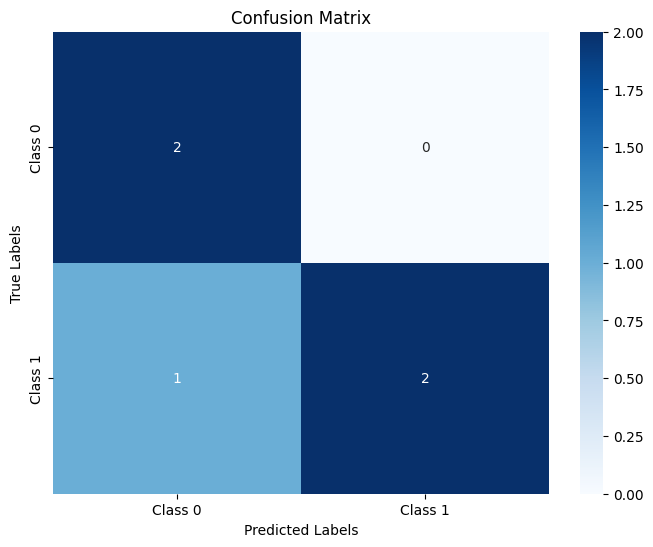

Classification Report:


In [49]:
# write your code
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    print("Classification Report:")
y_true = np.array([0, 1, 1, 0, 1])
y_pred = np.array([0, 1, 1, 0, 0])

evaluate_model(y_true, y_pred)



#### **5.8 Train and Evaluate the Model**

Train the logistic regression model using the training for each gradient descent algorithm. Evaluate the model using the testing set and the `evaluate_model` function. Steps to follow:

- Call any of the gradient descent functions with the training data to get the optimized weights.
- Use the predict function to get the predictions on the testing data.
- Evaluate the model using the evaluate_model function.

Do this for all three gradient descent algorithms and compare the results.


Iteration 0: Cost 0.6931
Iteration 100: Cost 0.6666
Iteration 200: Cost 0.6571
Iteration 300: Cost 0.6485
Iteration 400: Cost 0.6406
Iteration 500: Cost 0.6335
Iteration 600: Cost 0.6270
Iteration 700: Cost 0.6211
Iteration 800: Cost 0.6157
Iteration 900: Cost 0.6108
Evaluating model using batch_gradient_descent:


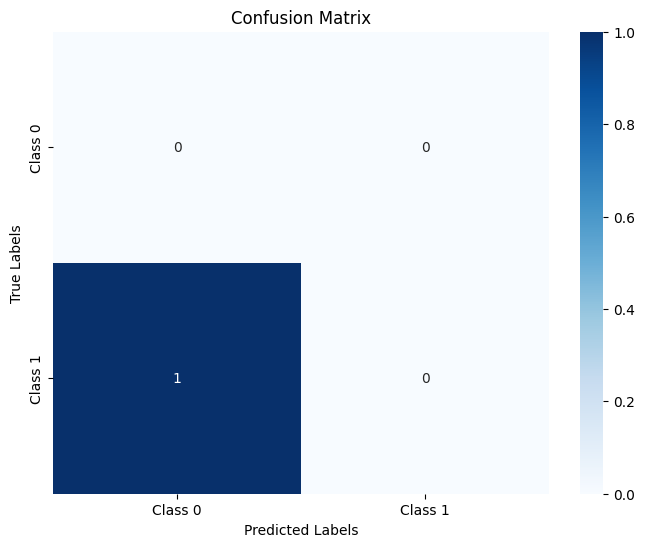

Classification Report:


Epoch 1: Cost 0.6869
Epoch 2: Cost 0.6832
Epoch 3: Cost 0.6808
Epoch 4: Cost 0.6792
Epoch 5: Cost 0.6780
Epoch 6: Cost 0.6771
Epoch 7: Cost 0.6763
Epoch 8: Cost 0.6756
Epoch 9: Cost 0.6750
Epoch 10: Cost 0.6745
Evaluating model using stochastic_gradient_descent:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


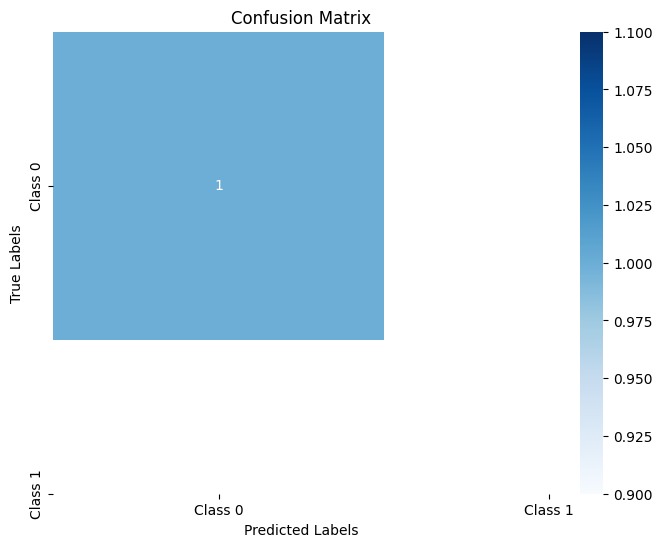

Classification Report:


Epoch 1: Cost 0.6904
Epoch 2: Cost 0.6882
Epoch 3: Cost 0.6862
Epoch 4: Cost 0.6846
Epoch 5: Cost 0.6832
Epoch 6: Cost 0.6820
Epoch 7: Cost 0.6810
Epoch 8: Cost 0.6802
Epoch 9: Cost 0.6794
Epoch 10: Cost 0.6788
Evaluating model using mini_batch_gradient_descent:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


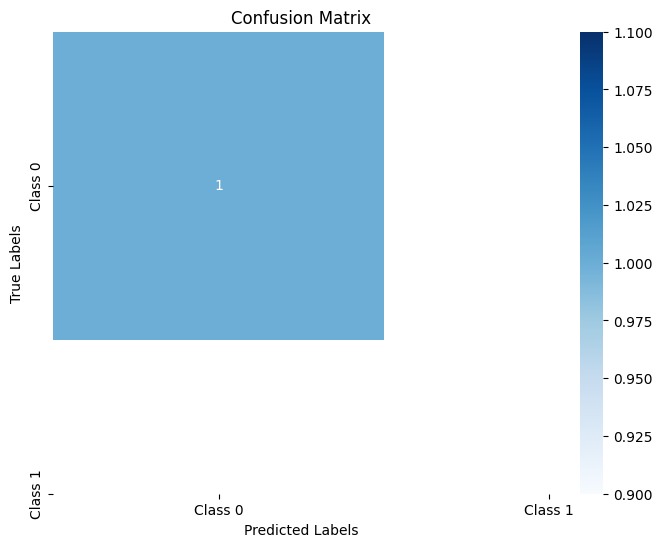

Classification Report:




In [50]:
# write your code

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train and Evaluate the Model
def train_and_evaluate(gradient_descent_function, X_train, y_train, X_test, y_test, **kwargs):

    weights, bias = gradient_descent_function(X_train, y_train, **kwargs)
    y_pred = predict(X_test, weights, bias)
    print(f"Evaluating model using {gradient_descent_function.__name__}:")
    evaluate_model(y_test, y_pred)
    print("\n" + "=" * 50 + "\n")
train_and_evaluate(batch_gradient_descent, X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=1000)
train_and_evaluate(stochastic_gradient_descent, X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=10)
train_and_evaluate(mini_batch_gradient_descent, X_train, y_train, X_test, y_test, batch_size=32, learning_rate=0.01, n_iterations=10)

